# Spam Email Classification Using Naive Bayes Therome

### Introducing the database

The database for this example is taken from https://www.kaggle.com/datasets/purusinghvi/email-spam-classification-dataset?resource=download

### Importing the necessary libraries

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import ConfusionMatrixDisplay, classification_report 

### Reading the database

In [2]:
file = './combined_data.csv'
file

'./combined_data.csv'

In [3]:
data = pd.read_csv(file)
data

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [4]:
data.isnull().sum()

label    0
text     0
dtype: int64

In [5]:
# Handling duplicates

print(f"Number of duplicated urls : {np.sum(data.duplicated())}")
data.drop_duplicates(inplace = True)
print(f"Number of duplicated urls (after dropping duplicates) : {np.sum(data.duplicated())}")

Number of duplicated urls : 0
Number of duplicated urls (after dropping duplicates) : 0


In [6]:
data['label'].value_counts()

label
1    43910
0    39538
Name: count, dtype: int64

### Defining the inputs and the target. Creating the train-test split.

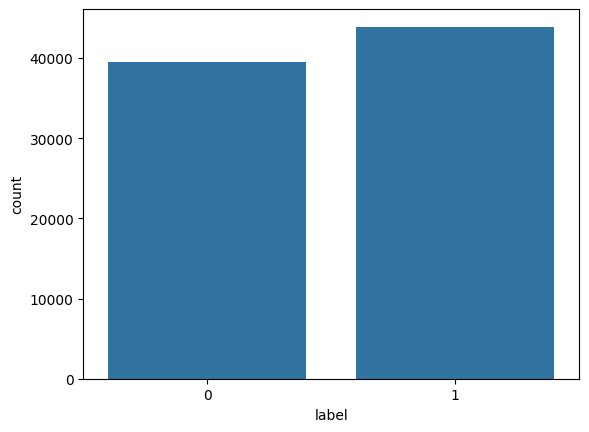

In [27]:
sns.countplot(x = 'label', data = data)
plt.show()

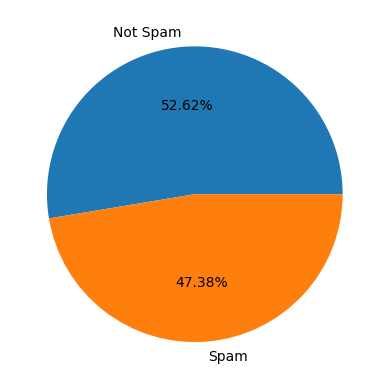

In [8]:
labels = {0 : "Not Spam", 1 : "Spam"}
label_counts = data['label'].value_counts()
plt.pie(label_counts, labels = labels.values(), autopct = "%.2f%%")
plt.show()

In [9]:
inputs = data["text"]
target = data["label"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(inputs,
                                                   target,
                                                   test_size = 0.2,
                                                   random_state = 7,
                                                   stratify  = target)

In [11]:
y_train.value_counts(normalize = True)

label
1    0.526199
0    0.473801
Name: proportion, dtype: float64

In [12]:
y_test.value_counts(normalize = True)

label
1    0.526183
0    0.473817
Name: proportion, dtype: float64

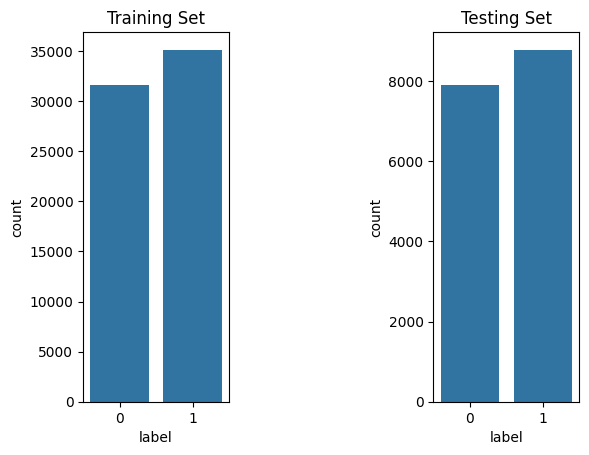

In [13]:
plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.countplot(x = y_train)

plt.subplot(1, 3, 3)
plt.title("Testing Set")
sns.countplot(x = y_test)
plt.show()

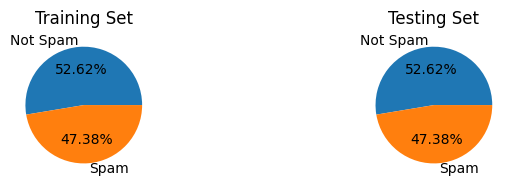

In [14]:
plt.subplot(1, 3, 1)
plt.title("Training Set")
plt.pie(pd.Series(y_test).value_counts(), labels = labels.values(), autopct = "%.2f%%")

plt.subplot(1, 3, 3)
plt.title("Testing Set")
plt.pie(pd.Series(y_test).value_counts(), labels = labels.values(), autopct = "%.2f%%")
plt.show()

### Vectorization and Transform

In [15]:
vectorizer = CountVectorizer()

In [16]:
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [17]:
x_train_transf.shape

(66758, 277153)

In [18]:
x_test_transf.shape

(16690, 277153)

### Performing the Classification

In [19]:
model = MultinomialNB()

In [20]:
model.fit(x_train_transf, y_train)

MultinomialNB()

In [21]:
model.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

In [22]:
np.exp(model.class_log_prior_)

array([0.47380089, 0.52619911])

### Performing the evaluation on the test dataset

In [23]:
y_test_pred = model.predict(x_test_transf)

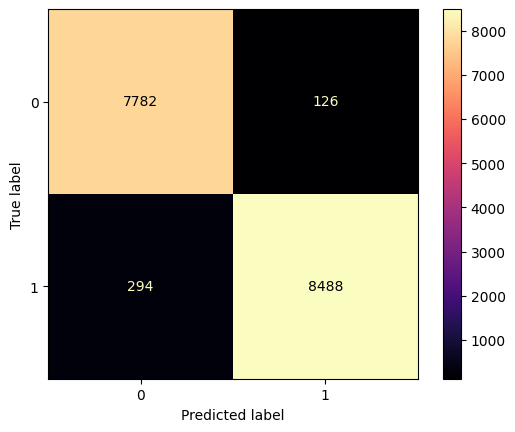

In [24]:
sns.reset_orig()

ConfusionMatrixDisplay.from_predictions(
    y_test, y_test_pred, 
    labels = model.classes_,
    cmap = 'magma'
)
plt.show()

In [25]:
print(classification_report(y_test, y_test_pred, target_names = ['Ham', 'Spam']))

              precision    recall  f1-score   support

         Ham       0.96      0.98      0.97      7908
        Spam       0.99      0.97      0.98      8782

    accuracy                           0.97     16690
   macro avg       0.97      0.98      0.97     16690
weighted avg       0.98      0.97      0.97     16690



## Export Model

In [26]:
import pickle
pickle.dump(vectorizer,open('./model/vectorizer.pkl','wb'))
pickle.dump(model,open('./model/model.pkl','wb'))